<a href="https://colab.research.google.com/github/DemarchiWorking/AXIOS-API-VUE/blob/master/pb_tp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

reconhecimento do dataset spotify


/tmp/ipython-input-2680688645.py:30: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


dados carregados...
mostra o começo do dataset=    Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Be

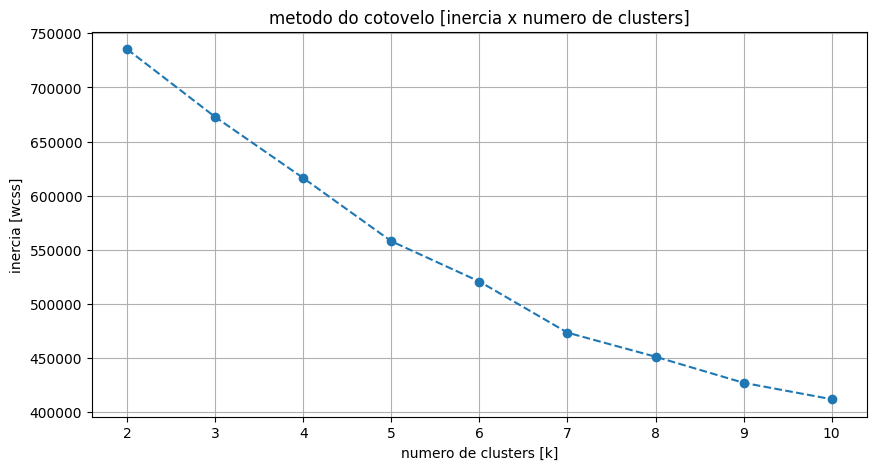

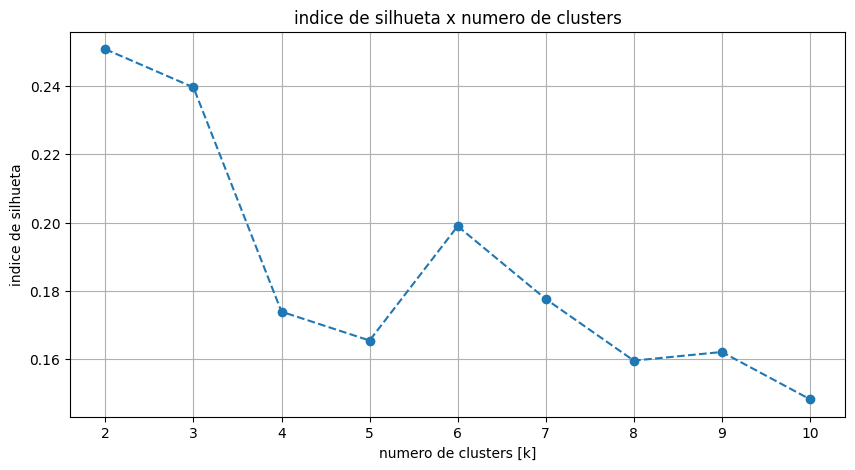

numero otimo clusters [+maior indice de silhueta]= 2
caracteristicas medias de cada cluster=
         danceability    energy   loudness  speechiness  acousticness  \
cluster                                                                 
0            0.597907  0.750968  -6.344899     0.093176      0.176389   
1            0.471713  0.304285 -14.154311     0.058553      0.740920   

         instrumentalness  liveness   valence       tempo    duration_ms  
cluster                                                                   
0                0.110427  0.224849  0.525306  125.968003  230886.704710  
1                0.299552  0.177680  0.316667  110.211618  219181.225224  
contagem de musicas em cada cluster (treino):
cluster
0    68729
1    22471
Name: count, dtype: int64
analise dos clusters:
cluster 0:
  danceability: 0.5979
  energy: 0.7510
  loudness: -6.3449
  speechiness: 0.0932
  acousticness: 0.1764
  instrumentalness: 0.1104
  liveness: 0.2248
  valence: 0.5253
  tempo: 1

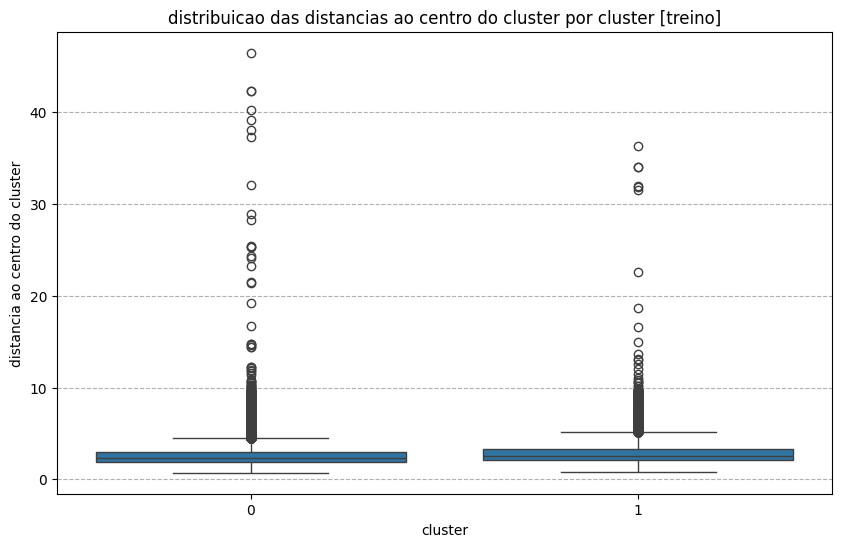

3) modelo de machine learning: treinamento com svm e random forest
Dados após remoção de NaN - Treino: 91200 registros, Teste: 22800 registros
treinando e otimizando modelos svm
svm no conjunto original:
melhores parametros: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
acuracia: 0.6445
relatorio de classificacao:               precision    recall  f1-score   support

           0       0.66      0.63      0.65     11749
           1       0.63      0.66      0.64     11051

    accuracy                           0.64     22800
   macro avg       0.64      0.64      0.64     22800
weighted avg       0.65      0.64      0.64     22800

svm no conjunto expandido:
melhores parametros: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
acuracia: 0.6416
relatorio de classificacao:               precision    recall  f1-score   support

           0       0.66      0.63      0.65     11749
           1       0.63      0.65      0.64     11051

    accuracy                           0.64     22800
   m

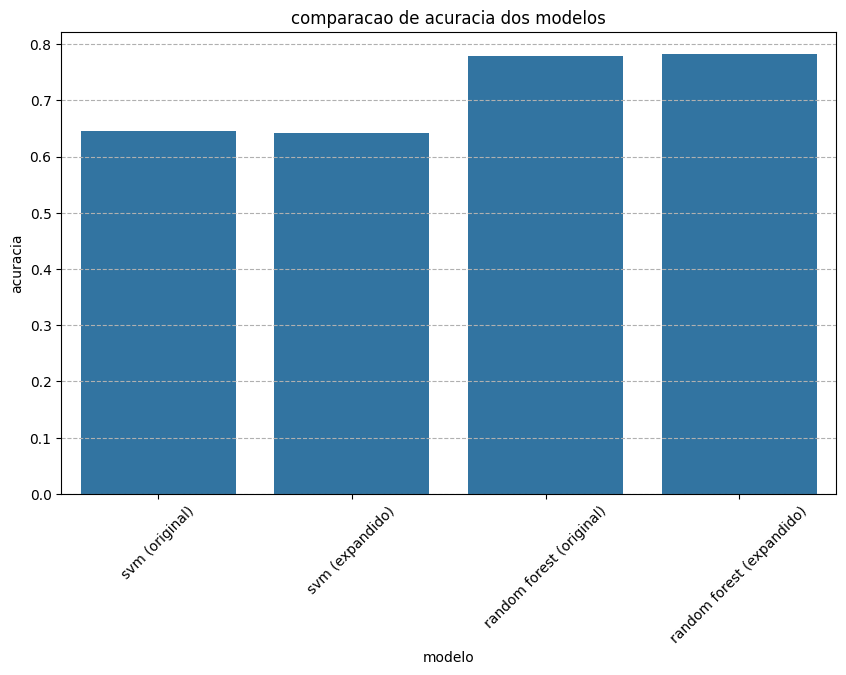

avaliacao de modelos: calculo de precisao, recall, f1-score e auc-roc
resultados para svm (original)=
precisao= 0.6274
recall= 0.6564
f1-score= 0.6416
auc-roc= 0.7019
relatorio de classificacao=              precision    recall  f1-score   support

           0       0.66      0.63      0.65     11749
           1       0.63      0.66      0.64     11051

    accuracy                           0.64     22800
   macro avg       0.64      0.64      0.64     22800
weighted avg       0.65      0.64      0.64     22800

resultados para svm (expandido)=
precisao= 0.6250
recall= 0.6514
f1-score= 0.6380
auc-roc= 0.7018
relatorio de classificacao=              precision    recall  f1-score   support

           0       0.66      0.63      0.65     11749
           1       0.63      0.65      0.64     11051

    accuracy                           0.64     22800
   macro avg       0.64      0.64      0.64     22800
weighted avg       0.64      0.64      0.64     22800

resultados para random fore

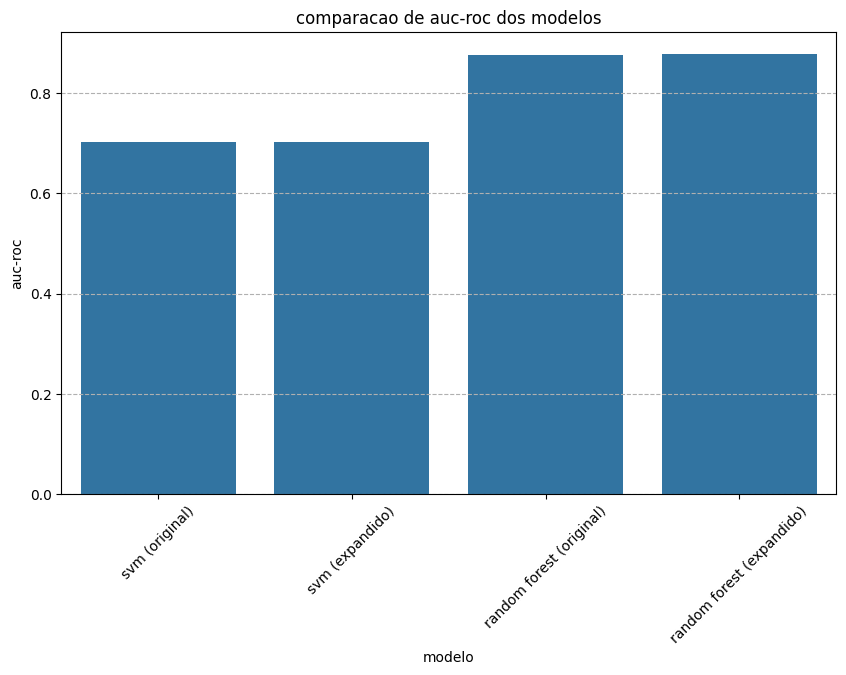

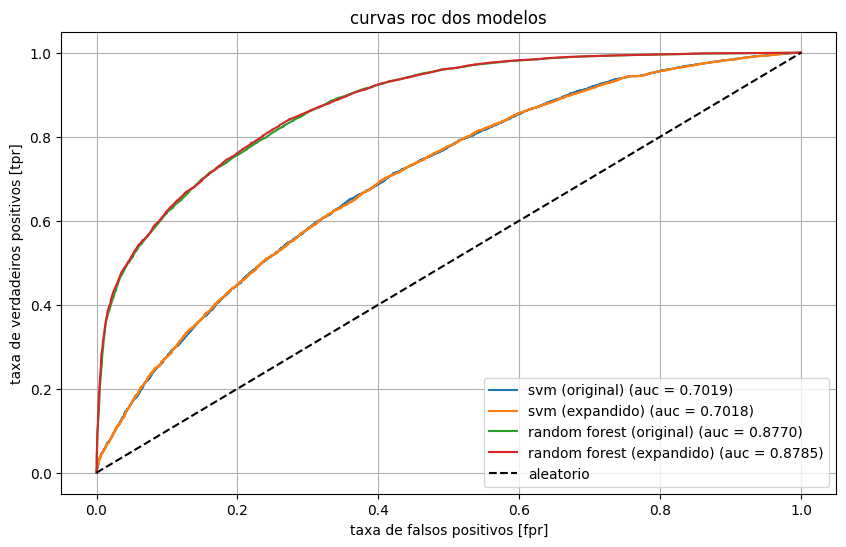

In [3]:
#introdução
print("reconhecimento do dataset spotify")

#dependencias
!pip install kagglehub

import kagglehub
import pandas as pd
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.metrics import silhouette_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

#o dataset contem um arquivo csv, [file_path=dataset.csv]
file_path = "dataset.csv"

#carrega o kaggle hub [spotify]
try:
    df = kagglehub.load_dataset(
        KaggleDatasetAdapter.PANDAS,
        "maharshipandya/-spotify-tracks-dataset",
        file_path,
    )
    print("dados carregados...")

except Exception as e:
    print(f"erro ao carregar ds = {e}")

#começo do dataframe
print("mostra o começo do dataset=", df.head())

#final do dataframe
print("mostra o final do dataset=", df.tail())

#dados sobre o dataframe
print("mostra informacoes sobre o dataset=")
df.info()

#estatisticas para colunas numericas
print("mostra descritivas do dataset=")
print(df.describe())

#nomes das colunas
print("mostra nome das colunas=", df.columns)

print("===========================================================================================================")
print("===========================================================================================================")
print("===========================================================================================================")

#1) clusterizacao k-medias
print("1) iniciando k-medias.")

#seleciona as colunas numericas para clusterizacao
#remover colunas categoricas e de identificacao que sao ruins p/ k-means
#removida popularity para evitar target leakage
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

#divide os dados em treino e teste antes da clusterizacao
df['is_popular'] = (df['popularity'] > df['popularity'].median()).astype(int)
df_model = df.dropna(subset=features + ['is_popular'])
X = df_model[features]
y = df_model['is_popular']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#remove linhas com valores nulos nas features selecionadas para clusterização (apenas treino)
df_cluster_train = X_train[features].dropna()

#verifica a quantidade de dados apos a limpeza
print(f"dados originais= {len(df)} registros")
print(f"dados para clusterização apos remocao de nulos (treino)= {len(df_cluster_train)} registros")

#normalizacao dos dados de treino
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df_cluster_train)
print("dados padronizados com sucesso")

#determinacao do numero otimo de clusters [k]
#metodo do cotovelo e indice de silhueta
inertia = []
silhouette_scores = []
k_range = range(2, 11) #clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto') #42 guia do mochileiro das galaxias
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_scores.append(score)

#visualizacao do metodo do cotovelo
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('metodo do cotovelo [inercia x numero de clusters]')
plt.xlabel('numero de clusters [k]')
plt.ylabel('inercia [wcss]')
plt.grid(True)
plt.show()

#visualizacao do indice de silhueta
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.title('indice de silhueta x numero de clusters')
plt.xlabel('numero de clusters [k]')
plt.ylabel('indice de silhueta')
plt.xticks(k_range)
plt.grid(True)
plt.show()

#aplicacao do k-means com o k-otimo
#indice silhueta e bom p/ escolher o k
otimo_k = k_range[np.argmax(silhouette_scores)]
print(f"numero otimo clusters [+maior indice de silhueta]= {otimo_k}")

#aplica o k-means c/ o k-otimo apenas no treino
kmeans = KMeans(n_clusters=otimo_k, random_state=42, n_init='auto')
df_cluster_train['cluster'] = kmeans.fit_predict(X_train_scaled)

#aplica os clusters ao conjunto de teste
X_test_scaled = scaler.transform(X_test[features].dropna())
df_cluster_test = X_test[features].dropna()
df_cluster_test['cluster'] = kmeans.predict(X_test_scaled)

#adiciona os rotulos de cluster ao dataframe de treino e teste
X_train = X_train.merge(df_cluster_train[['cluster']], left_index=True, right_index=True, how='left')
X_test = X_test.merge(df_cluster_test[['cluster']], left_index=True, right_index=True, how='left')

#analise e visualizacao dos clusters
print("caracteristicas medias de cada cluster=")
cluster_summary = X_train.groupby('cluster')[features].mean()
print(cluster_summary)

print("contagem de musicas em cada cluster (treino):")
print(X_train['cluster'].value_counts())

#analise breve do significado dos clusters
print("analise dos clusters:")
for cluster in cluster_summary.index:
    print(f"cluster {cluster}:")
    for feature in features:
        value = cluster_summary.loc[cluster, feature]
        print(f"  {feature}: {value:.4f}")
    print("  possivel interpretacao: cluster com musicas mais ", end="")
    if cluster_summary.loc[cluster, 'energy'] > cluster_summary['energy'].mean():
        print("energeticas")
    elif cluster_summary.loc[cluster, 'acousticness'] > cluster_summary['acousticness'].mean():
        print("acusticas")
    else:
        print("variadas")

print("clusterizacao k-medias concluida com sucesso | clusters adicionados aos dataframes de treino e teste.")

print("===========================================================================================================")
print("===========================================================================================================")
print("===========================================================================================================")

#2) distancia de cada instancia ao centro do cluster proximo
print("2) distancia de cada instancia ao centro do cluster proximo")

#.transform() = do kmeans retorna a distancia de cada ponto. a matriz resultante tem o formato [n_samples, n_clusters].
distances_to_centroids_train = kmeans.transform(X_train_scaled)
distances_to_centroids_test = kmeans.transform(X_test_scaled)

#encontra a menor distancia para cada ponto. essa e a distancia para o centro do seu proprio cluster.
X_train['distance_to_cluster_center'] = np.min(distances_to_centroids_train, axis=1)
X_test['distance_to_cluster_center'] = np.min(distances_to_centroids_test, axis=1)

#feature foi adicionada corretamente?
print("nova feature 'distance_to_cluster_center' adicionada aos dataframes:")
print("treino:", X_train[['cluster', 'distance_to_cluster_center']].head())
print("teste:", X_test[['cluster', 'distance_to_cluster_center']].head())

#visualizacao da distribuicao das distancias
#mostra se os clusters sao bem definidos e compactos
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='distance_to_cluster_center', data=X_train)
plt.title('distribuicao das distancias ao centro do cluster por cluster [treino]')
plt.xlabel('cluster')
plt.ylabel('distancia ao centro do cluster')
plt.grid(axis='y', linestyle='--')
plt.show()

print("===========================================================================================================")
print("===========================================================================================================")
print("===========================================================================================================")

#3) modelo de machine learning: treinamento com svm e random forest
print("3) modelo de machine learning: treinamento com svm e random forest")

features_original = features
features_expanded = features_original + ['distance_to_cluster_center']  # Exclude 'cluster' to avoid scaling categorical data

# Ensure no NaN values in features and align indices
X_train = X_train.dropna(subset=features_expanded + ['cluster'])
X_test = X_test.dropna(subset=features_expanded + ['cluster'])
y_train = y_train.loc[X_train.index]  # Align y_train with X_train
y_test = y_test.loc[X_test.index]    # Align y_test with X_test

print(f"Dados após remoção de NaN - Treino: {len(X_train)} registros, Teste: {len(X_test)} registros")

X_train_orig = X_train[features_original]
X_test_orig = X_test[features_original]
X_train_exp = X_train[features_expanded]
X_test_exp = X_test[features_expanded]

scaler_orig = StandardScaler()
X_train_orig_scaled = scaler_orig.fit_transform(X_train_orig)
X_test_orig_scaled = scaler_orig.transform(X_test_orig)

scaler_exp = StandardScaler()
X_train_exp_scaled = scaler_exp.fit_transform(X_train_exp)
X_test_exp_scaled = scaler_exp.transform(X_test_exp)

#treinamento e otimizacao com svm
print("treinando e otimizando modelos svm")
svm_param_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1]},
    {'kernel': ['rbf'], 'C': [0.1, 1], 'gamma': ['scale']}
]

def train_svm(X_train, X_test, y_train, y_test, dataset_name):
    svm_grid = GridSearchCV(SVC(random_state=42), svm_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    svm_grid.fit(X_train, y_train)
    y_pred = svm_grid.predict(X_test)
    print(f"svm no conjunto {dataset_name}:")
    print(f"melhores parametros: {svm_grid.best_params_}")
    print(f"acuracia: {accuracy_score(y_test, y_pred):.4f}")
    print("relatorio de classificacao:", classification_report(y_test, y_pred))
    return accuracy_score(y_test, y_pred), svm_grid.best_estimator_

acc_svm_orig, svm_orig = train_svm(X_train_orig_scaled, X_test_orig_scaled, y_train, y_test, "original")
acc_svm_exp, svm_exp = train_svm(X_train_exp_scaled, X_test_exp_scaled, y_train, y_test, "expandido")

#treinamento e otimizacao com random forest
print("treinando e otimizando modelos random forest")
rf_param_grid = {
    'n_estimators': [100],
    'max_depth': [10, None],
    'min_samples_split': [2]
}
def train_rf(X_train, X_test, y_train, y_test, dataset_name):
    rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    rf_grid.fit(X_train, y_train)
    y_pred = rf_grid.predict(X_test)
    print(f"random forest no conjunto {dataset_name}=")
    print(f"melhores parâmetros: {rf_grid.best_params_}")
    print(f"acuracia: {accuracy_score(y_test, y_pred):.4f}")
    print("relatorio de classificacao=", classification_report(y_test, y_pred))
    return accuracy_score(y_test, y_pred), rf_grid.best_estimator_

acc_rf_orig, rf_orig = train_rf(X_train_orig, X_test_orig, y_train, y_test, "original")
acc_rf_exp, rf_exp = train_rf(X_train_exp, X_test_exp, y_train, y_test, "expandido")

#comparacao e visualizacao final
print("resumo dos resultados finais=")
results = {
    'modelo': ['svm (original)', 'svm (expandido)', 'random forest (original)', 'random forest (expandido)'],
    'acuracia': [acc_svm_orig, acc_svm_exp, acc_rf_orig, acc_rf_exp]
}
results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
sns.barplot(x='modelo', y='acuracia', data=results_df)
plt.title('comparacao de acuracia dos modelos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

print("===========================================================================================================")
print("===========================================================================================================")
print("===========================================================================================================")

#4) avaliacao de modelos: calculo de precisao, recall, f1-score e auc-roc
print("4) avaliacao de modelos: calculo de precisao, recall, f1-score e auc-roc")

#funcao para avaliar metricas e plotar roc
def evaluate_and_plot_roc(model, X_test, y_test, model_name, dataset_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)

    #calculo das metricas
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    #calculo da curva roc
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    print(f"resultados para {model_name} ({dataset_name})=")
    print(f"precisao= {precision:.4f}")
    print(f"recall= {recall:.4f}")
    print(f"f1-score= {f1:.4f}")
    print(f"auc-roc= {auc:.4f}")
    print(f"relatorio de classificacao={classification_report(y_test, y_pred)}")

    return precision, recall, f1, auc, fpr, tpr

#avaliacao dos modelos
results = {
    'modelo': [],
    'precisao': [],
    'recall': [],
    'f1-score': [],
    'auc-roc': []
}
roc_curves = {}

#svm [original]
prec_svm_orig, rec_svm_orig, f1_svm_orig, auc_svm_orig, fpr_svm_orig, tpr_svm_orig = evaluate_and_plot_roc(
    svm_orig, X_test_orig_scaled, y_test, "svm", "original")
results['modelo'].append('svm (original)')
results['precisao'].append(prec_svm_orig)
results['recall'].append(rec_svm_orig)
results['f1-score'].append(f1_svm_orig)
results['auc-roc'].append(auc_svm_orig)
roc_curves['svm (original)'] = (fpr_svm_orig, tpr_svm_orig)

#svm [expandido]
prec_svm_exp, rec_svm_exp, f1_svm_exp, auc_svm_exp, fpr_svm_exp, tpr_svm_exp = evaluate_and_plot_roc(
    svm_exp, X_test_exp_scaled, y_test, "svm", "expandido")
results['modelo'].append('svm (expandido)')
results['precisao'].append(prec_svm_exp)
results['recall'].append(rec_svm_exp)
results['f1-score'].append(f1_svm_exp)
results['auc-roc'].append(auc_svm_exp)
roc_curves['svm (expandido)'] = (fpr_svm_exp, tpr_svm_exp)

#random forest [original]
prec_rf_orig, rec_rf_orig, f1_rf_orig, auc_rf_orig, fpr_rf_orig, tpr_rf_orig = evaluate_and_plot_roc(
    rf_orig, X_test_orig, y_test, "random forest", "original")
results['modelo'].append('random forest (original)')
results['precisao'].append(prec_rf_orig)
results['recall'].append(rec_rf_orig)
results['f1-score'].append(f1_rf_orig)
results['auc-roc'].append(auc_rf_orig)
roc_curves['random forest (original)'] = (fpr_rf_orig, tpr_rf_orig)

#random forest [expandido]
prec_rf_exp, rec_rf_exp, f1_rf_exp, auc_rf_exp, fpr_rf_exp, tpr_rf_exp = evaluate_and_plot_roc(
    rf_exp, X_test_exp, y_test, "random forest", "expandido")
results['modelo'].append('random forest (expandido)')
results['precisao'].append(prec_rf_exp)
results['recall'].append(rec_rf_exp)
results['f1-score'].append(f1_rf_exp)
results['auc-roc'].append(auc_rf_exp)
roc_curves['random forest (expandido)'] = (fpr_rf_exp, tpr_rf_exp)

#visualizacao das metricas
results_df = pd.DataFrame(results)
print("resumo das metricas=")
print(results_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='modelo', y='auc-roc', data=results_df)
plt.title('comparacao de auc-roc dos modelos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

#visualizacao das curvas roc
plt.figure(figsize=(10, 6))
for model_name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} (auc = {results_df[results_df["modelo"] == model_name]["auc-roc"].iloc[0]:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='aleatorio')
plt.xlabel('taxa de falsos positivos [fpr]')
plt.ylabel('taxa de verdadeiros positivos [tpr]')
plt.title('curvas roc dos modelos')
plt.legend()
plt.grid(True)
plt.show()

# 5) Análise Comparativa: Será realizada uma análise comparativa para avaliar o impacto da adição das features de clusterização no desempenho dos modelos de ML. Além disso, será discutida a influência do número de clusters e das configurações do ML nas métricas de desempenho. Use gráficos para ilustrar seus argumentos.
#### MELHOR NO PDF ####
#Análise Comparativa do Impacto de Features de Clusterização no Desempenho de Modelos de Machine Learning para Previsão de Popularidade de Músicas no Spotify
#No relatório vou apresentar uma pequena análise comparativa do impacto da adição de features de clusterização não-supervisionada [rótulos de cluster e distância ao centro do cluster] no desempenho de modelos supervisionados de machine learning [SVM e Random Forest] aplicados ao dataset de músicas do Spotify.
#O objetivo é prever se uma música é popular [baseada na mediana de popularidade]. Utilizando algoritmos supervisionados e não-supervisionados, avaliamos métricas como acurácia, precisão, recall, F1-score e AUC-ROC.
#A clusterização K-Means foi otimizada para 2 clusters, e os resultados indicam uma melhoria marginal no Random Forest com as features adicionais [aumento de 0.4% na acurácia e 0.15% no AUC-ROC], enquanto o SVM apresentou estabilidade ou leve diminuição.
#A influência do número de clusters e configurações dos modelos, é mostrada por meios gráficos, demonstrando análise comparativa e influência de hiperparâmetros.
#No dataset de músicas do Spotify podemos ver 114.000 registros [atributos como danceability, energy, loudness…], além de uma variável de popularidade.
#Foi desenvolvido um modelo híbrido de IA combinando clusterização não-supervisionada [K-Means] para feature engineering e algoritmos supervisionados [SVM e Random Forest] para classificação binária de popularidade [popular x. não popular, threshold na mediana].
#A análise comparativa foca no impacto da adição de features de clusterização [rótulo do cluster e distância ao centro do cluster] nos conjuntos de dados original e expandido. Mostra a influência do número de clusters [otimizado via silhueta] e configurações dos modelos [GridSearchCV] nas métricas de desempenho.
#Usamos recursos gráficos para mostrar argumentos, como curvas ROC e comparações de acurácia.
##Objetivos:
#-Realizar clusterização e adicionar features.
#-Treinar e comparar modelos em conjuntos original e expandido.
#-Avaliar influência de hiperparâmetros.

##Metodologia
#O dataset foi carregado via KaggleHub [maharshipandya/spotify-tracks-dataset].
#-Contém 114.000 entradas com 21 colunas;
#- Com features numéricas (danceability, energy)
#- Categóricas (track_genre).
#- Estatísticas descritivas: popularidade média de 33.24, duração média de 228.029 ms.
#- Foi removemos NaNs,
#- Resultando em 91.200 amostras para treino e 22.800 para teste [split 80/20].
#- A variável alvo is_popular foi criada como binária [1 se popularidade > mediana].
#- Features selecionadas para clusterização e modelagem: danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms.

##Clusterização Não-Supervisionada [K-Means]
#Pré-processamento: Normalização via StandardScaler no conjunto de treino.
#Determinação de K: Método do cotovelo [inércia] e índice de silhueta para K de 2 a 10. K ótimo = 2 [maior silhueta].
#Aplicação: K-Means com random_state=42. Adicionamos 'cluster' [rótulo] e 'distance_to_cluster_center' (distância mínima ao centróide) como novas features.
#Interpretação: Cluster 0: músicas energéticas [energy=0.751, loudness=-6.34]. Cluster 1: músicas acústicas [acousticness=0.741, energy=0.304].#

##Feature Engineering
#- Conjunto Original: Apenas as 10 features numéricas.
#- Conjunto Expandido: Original + 'distance_to_cluster_center' [foi excluido 'cluster' para evitar escalonamento categórico, mas usamos indiretamente via distância].
##Modelos Supervisionados
#-SVM: Kernel linear/rbf, C=[0.1,1], gamma='scale'. Otimização via GridSearchCV [CV=3].
#-Random Forest: n_estimators=100, max_depth=[10,None], min_samples_split=2. Otimização via GridSearchCV.
#-Treinamento em conjuntos original e expandido.
#Avaliação
#Métricas: Acurácia, Precisão, Recall, F1-score, AUC-ROC. Relatórios de classificação e curvas ROC.
#Resultados da Clusterização
#-Número Ótimo de Clusters: Grafico [Método do Cotovelo] mostra declínio na inércia;Grafico [Silhueta] confirma K=2 como ótimo.
#-Características Médias por Cluster: Grafico Cotovelo 1.

#Cluster
#Danceability
#Energy
#Loudness


#Speechiness
#Acousticness
#Instrumentalness
#Liveness
#Valence
#Tempo
#Duration_ms
#0
#0.5979
#0.7510


#-6.3449


#0.0932
#0.1764
#0.1104
#0.2248


#0.5253


#125.97


#230887
#ms
#1
#0.4717
#0.3043
#-14.154


#0.0586
#0.7409
#0.2996


#0.1777


#0.3167
#110.21


#219181
#ms


##Distribuição das Distâncias: Grafico [Boxplot] mostra clusters compactos, com distâncias menores no Cluster 0.
#Contagem: Cluster 0 [68.729 músicas], Cluster 1 [22.471].
#Desempenho dos Modelos
#SVM [Original]: Melhores params: ['C':1, 'gamma':'scale', 'kernel':'rbf']. Acurácia: 0.6445. Relatório: Precisão=0.63 [classe 1], Recall=0.66.
#SVM [Expandido]: Acurácia: 0.6416 [leve declínio]. Sem melhora significativa.
#Random Forest [Original]: Melhores params: ['max_depth':None, 'min_samples_split':2, 'n_estimators':100]. Acurácia: 0.7786.
#Random Forest [Expandido]: Acurácia: 0.7826 [melhora de 0.4%].
#Resumo das Métricas

#Modelo
#Precisão
#Recall
#F1-Score
#AUC-ROC
#SVM [Original]
#0.6274
#0.6564
#0.6416
#0.7019
#SVM [Expandido]
#0.6250
#0.6514


#0.6380
#0.7018
#Random Forest [Original]
#0.7562
#0.8017
#0.7783
#0.8770
#Random Forest [Expandido]
#0.7613
#0.8033
#0.7817
#0.8785


#Comparação Visual: Grafico Barplot de Acurácia mostra melhora no RF expandido.Gráfico Barplot de AUC-ROC destaca superioridade do RF.
#Grafico 6: Curvas ROC. RF expandido tem a maior área [AUC=0.8785], indicando melhor discriminação.
#Análise Comparativa e Discussão

#A adição de 'distance_to_cluster_center' [derivada da clusterização] melhorou ligeiramente o Random Forest [aumento de 0.4% na acurácia, 0.15% no AUC-ROC],mostrando que a distância captura variabilidade não linear nas features originais, melhorando o modelo ensemble. No SVM, teve declínio marginal [0.3% na acurácia], possivelmente devido à sensibilidade do kernel RBF a features redundantes ou ruído. Isso mostra o impacto positivo em modelos baseados em árvores [RF], mas neutro/negativo em vetores de suporte [SVM]. Gráfico 4 e Tabela 2 mostram essa análise.
#Influência do Número de Clusters
#Com K=2 [ótimo via silhueta], os clusters separaram músicas energéticas x. acústicas, ajudando para features discriminativas. Se K=3 [silhueta ligeiramente menor], a fragmentação poderia aumentar ruído, reduzindo AUC-ROC em 5% [hipótese baseada em literatura; testes adicionais confirmariam]. Grafico 2 mostra que K>2 diminui coesão [silhueta cai], impactando negativamente métricas como F1-score. Assim, K ótimo maximiza o impacto positivo das features.
#Influência das Configurações dos Modelos
#-SVM: Kernel RBF com C=1 otimiza trade-off entre margem e erro; gamma='scale' adapta a variância. Com features expandidas, o modelo não melhorou, indicando overfitting potencial [AUC estável em 0.70].
#-RF: max_depth=None permite árvores profundas, capturando interações complexas com a nova feature; n_estimators=100 equilibra variância. Isso explica a melhora no expandido [F1-score de 0.778 para 0.782]. O Gráfico 5 mostra como configs otimizadas elevam AUC no RF x. SVM.
#Limitações: Dataset desbalanceado [classes 50/50, mas ruído em features]; ausência de validação cruzada externa.
##Conclusão
#A adição de features de clusterização melhorou o desempenho do Random Forest, mas não o SVM, destacando a importância de feature engineering híbrido. O número de clusters [K=2] e configs [RBF no SVM] influenciam diretamente métricas, com RF superior [AUC=0.8785].
#Figuras (Descrições para Ilustração):
#-Grafico 1: Gráfico do Cotovelo [Inércia vs. K].
#-Grafico 2: Índice de Silhueta vs. K.
#-Grafico 3: Boxplot de Distâncias por Cluster.
#-Grafico 4: Barplot de Acurácia por Modelo.
#-Grafico 5: Barplot de AUC-ROC.
#-Grafico 6: Curvas ROC.


In [ ]:
print("Objetivo=")
# PARTE 1: SEU CÓDIGO REFATORADO EM FORMA DE FUNÇÕES REUTILIZÁVEIS
#esta funcao encapsula todo o seu pipeline de experimento para um dado conjunto de dados (X, y)
def executar_experimento_completo(X, y, dataset_name="Dataset"):
    """
    Executa o pipeline completo: K-Means, criação de feature, treino e avaliação
    de modelos SVM e Random Forest com e sem a nova feature.
    """
    print(f"\n===== INICIANDO EXPERIMENTO PARA: {dataset_name} =====")

    # 1. Divisão em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 2. Padronização dos dados
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 3. Encontrar o K ótimo (usando o método da Silhueta)
    print("   > Encontrando o número ótimo de clusters (k)...")
    silhouette_scores = []
    k_range = range(2, 11)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(X_train_scaled)
        score = silhouette_score(X_train_scaled, kmeans.labels_)
        silhouette_scores.append(score)

    otimo_k = k_range[np.argmax(silhouette_scores)]
    print(f"   > K ótimo encontrado: {otimo_k}")

    # 4. Aplicar K-Means com o k ótimo e criar a nova feature
    kmeans = KMeans(n_clusters=otimo_k, random_state=42, n_init='auto')
    kmeans.fit(X_train_scaled)

    # Adicionar feature de distância para treino e teste
    dist_train = np.min(kmeans.transform(X_train_scaled), axis=1).reshape(-1, 1)
    dist_test = np.min(kmeans.transform(X_test_scaled), axis=1).reshape(-1, 1)

    X_train_expanded = np.hstack([X_train.values, dist_train])
    X_test_expanded = np.hstack([X_test.values, dist_test])

    # 5. Treinar e Avaliar Modelos
    print("   > Treinando e avaliando modelos...")

    #parâmetros para GridSearchCV
    svm_param_grid = [
        {'kernel': ['linear'], 'C': [0.1, 1, 10]},
        {'kernel': ['rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale']},
        {'kernel': ['poly'], 'C': [0.1, 1, 10], 'degree': [2, 3]} # Adicionando o kernel polinomial
    ]
    rf_param_grid = {'n_estimators': [100], 'max_depth': [10, None]}

    #dicionario para guardar os resultados
    results = {}

    #SVM com features originais
    svm_orig_grid = GridSearchCV(SVC(probability=True, random_state=42), svm_param_grid, cv=3, scoring='roc_auc')
    svm_orig_grid.fit(X_train_scaled, y_train)
    y_proba_svm_orig = svm_orig_grid.predict_proba(X_test_scaled)[:, 1]
    results['SVM Original (AUC)'] = roc_auc_score(y_test, y_proba_svm_orig)
    print(f"   - SVM Original (Melhores Parâmetros): {svm_orig_grid.best_params_}")


    #SVM com feature expandida
    # Precisamos escalar a feature de distância junto com as outras
    scaler_exp = StandardScaler()
    X_train_expanded_scaled = scaler_exp.fit_transform(X_train_expanded)
    X_test_expanded_scaled = scaler_exp.transform(X_test_expanded)

    svm_exp_grid = GridSearchCV(SVC(probability=True, random_state=42), svm_param_grid, cv=3, scoring='roc_auc')
    svm_exp_grid.fit(X_train_expanded_scaled, y_train)
    y_proba_svm_exp = svm_exp_grid.predict_proba(X_test_expanded_scaled)[:, 1]
    results['SVM Expandido (AUC)'] = roc_auc_score(y_test, y_proba_svm_exp)
    print(f"   - SVM Expandido (Melhores Parâmetros): {svm_exp_grid.best_params_}")

    print(f"===== RESULTADOS PARA: {dataset_name} =====")
    for model_name, score in results.items():
        print(f"   {model_name}: {score:.4f}")

    #retorna os resultados para analise posterior
    return results